In [3]:
# Importiere die notwendigen Bibliotheken
import pandas as pd
from tabulate import tabulate
import math
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Lese die CSV-Datei ein
# Ersetze 'sails_results.csv' durch den Pfad zu deiner CSV-Datei
df = pd.read_csv('isals_parameter_results.csv')

# Round 'RunTime' to the nearest integer
df['RunTime'] = df['RunTime'].round(2).astype(int)

# Convert 'WaitingTime' to integers as it only has whole numbers
df['WaitingTime'] = df['WaitingTime'].astype(int)

# Rename specific columns
df = df.rename(columns={
    'min_temperature': 'End Temperature',
    'temp_decrease_factor': 'Decrease Factor',
    'start_temperature': 'Start Temperature',
    # Add more columns to rename as needed
})

#table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
df.head(3)

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit,MaxRandomMoves
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900,10000
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900,10000
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900,10000


##### Calculale RPD

In [4]:
#Find the maximum 'TotalProfit' for each 'Instance'
max_profit_per_instance = df.groupby('Instance')['TotalProfit'].transform('max')

# Calculate RPD
df['RPD'] = ((max_profit_per_instance - df['TotalProfit']) / max_profit_per_instance) * 100

# Function to calculate iterations based on start temperature, min temperature, and temp decrease factor
def calculate_iterations(T_start, T_min, alpha):
    # Check if alpha is less than 1 to avoid errors
    if alpha < 1:
        iterations = math.log(T_min / T_start) / math.log(alpha)
        return int(iterations)
    else:
        return None  # Return None or handle cases where alpha is not less than 1

# Apply the formula to each row of the DataFrame
df['SA_Runs'] = df.apply(
    lambda row: calculate_iterations(row['Start Temperature'], row['End Temperature'], row['Decrease Factor']), axis=1)

In [5]:
df

,Instance,Start Temperature,End Temperature,Decrease Factor,TotalProfit,WaitingTime,TotalTasks,Iterations,RunTime,TimeLimit,MaxRandomMoves,RPD,SA_Runs
0,7_2_1,100,1.000000e-20,0.95,762,3530,272,121,900,900,10000,1.804124,987
1,7_2_1,100,1.000000e-20,0.99,761,3879,272,24,915,900,10000,1.932990,5040
2,7_2_1,100,1.000000e-40,0.95,765,3675,272,75,903,900,10000,1.417526,1885
3,7_2_1,100,1.000000e-40,0.99,762,3407,272,15,958,900,10000,1.804124,9622
4,7_2_1,1000,1.000000e-20,0.95,775,2691,275,83,905,900,10000,0.128866,1032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,7_8_1,10000,1.000000e-40,0.90,2167,13033,933,190,904,900,1000,0.505051,961
239,7_8_1,10000,1.000000e-40,0.95,2168,10491,937,154,902,900,100,0.459137,1975
240,7_8_1,10000,1.000000e-40,0.95,2165,12215,936,86,901,900,1000,0.596878,1975
241,7_8_1,10000,1.000000e-40,0.99,2166,13472,933,28,901,900,100,0.550964,10080


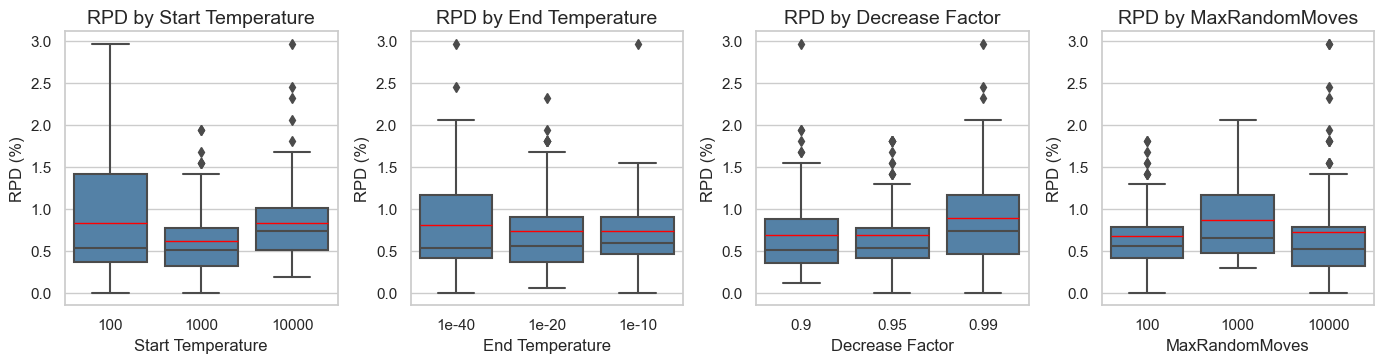

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot (adding 'MaxRandomMoves')
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor', 'MaxRandomMoves']

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - one for each parameter (now 4 subplots for 4 parameters)
fig, axes = plt.subplots(1, len(parameters), figsize=(14, 4))  # Adjust the width for 4 plots

# Loop through the parameters and create boxplots in subplots
for i, param in enumerate(parameters):
    sns.boxplot(x=param, y='RPD', data=df, showmeans=True, meanline=True,
                meanprops={"color": "red", "ls": "-", "lw": 1},
                color=boxplot_color, ax=axes[i])  # Set consistent color
    
    # Set titles for each subplot
    axes[i].set_title(f'RPD by {param}', fontsize=14)
    axes[i].set_xlabel(param, fontsize=12)
    axes[i].set_ylabel('RPD (%)', fontsize=12)

# Adjust the layout to make space for the overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])


# Save the figure as a PNG file
plt.savefig('rpd_box_plots_ISALS.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()

In [7]:

'''
# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor']

# List of instances
instances = df['Instance'].unique()

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Create subplots - we want a 3x3 grid (3 rows for each instance, 3 columns for each parameter)
fig, axes = plt.subplots(len(instances), len(parameters), figsize=(14, 14))

# Loop through the instances and parameters to create boxplots in subplots
for row, instance in enumerate(instances):
    # Filter the dataframe for the current instance
    instance_df = df[df['Instance'] == instance]
    
    # Add a header above the row for the instance (on the first plot in each row)
    axes[row, 1].set_title(f'Instance: {instance}', fontsize=16, pad=20)

    for col, param in enumerate(parameters):
        sns.boxplot(x=param, y='RPD', data=instance_df, showmeans=True, meanline=True,
                    meanprops={"color": "red", "ls": "-", "lw": 1},
                    color=boxplot_color, ax=axes[row, col])  # Set consistent color
        
        # Set axis labels for each subplot
        axes[row, col].set_xlabel(param, fontsize=12)
        
        # Only set ylabel for the first column of each row to avoid repetition
        if col == 0:
            axes[row, col].set_ylabel('RPD (%)', fontsize=12)
        else:
            axes[row, col].set_ylabel('')

# Adjust the layout to make space for the instance headers and overall formatting
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure as a PNG file
plt.savefig('rpd_box_plots_by_instance.png', dpi=300)  # Save with high dpi for quality

# Show the plot
plt.show()
'''

'\n# Assuming \'df\' is your DataFrame with the calculated RPD\n\n# Set global plot style to serif font\nplt.rcParams["font.family"] = "serif"\n\n# Set seaborn style for whitegrid (can adjust to suit scientific purposes)\nsns.set(style="whitegrid")\n\n# Parameters to plot\nparameters = [\'Start Temperature\', \'End Temperature\', \'Decrease Factor\']\n\n# List of instances\ninstances = df[\'Instance\'].unique()\n\n# Set a consistent color for all box plots\nboxplot_color = "steelblue"\n\n# Create subplots - we want a 3x3 grid (3 rows for each instance, 3 columns for each parameter)\nfig, axes = plt.subplots(len(instances), len(parameters), figsize=(14, 14))\n\n# Loop through the instances and parameters to create boxplots in subplots\nfor row, instance in enumerate(instances):\n    # Filter the dataframe for the current instance\n    instance_df = df[df[\'Instance\'] == instance]\n    \n    # Add a header above the row for the instance (on the first plot in each row)\n    axes[row, 1].

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the calculated RPD

# Set global plot style to serif font
plt.rcParams["font.family"] = "serif"

# Set seaborn style for whitegrid (can adjust to suit scientific purposes)
sns.set(style="whitegrid")

# Parameters to plot (adding 'MaxRandomMoves')
parameters = ['Start Temperature', 'End Temperature', 'Decrease Factor', 'MaxRandomMoves']

# List of instances
instances = df['Instance'].unique()

# Set a consistent color for all box plots
boxplot_color = "steelblue"

# Loop through the instances to create separate plots
for instance in instances:
    # Filter the dataframe for the current instance
    instance_df = df[df['Instance'] == instance]
    
    # Create a new figure for each instance
    fig, axes = plt.subplots(1, len(parameters), figsize=(14, 4))  # Adjust figure size for 4 columns
    
    # Add a title for the entire figure
    #fig.suptitle(f'Instance: {instance}', fontsize=16, y=0.94)
    
    # Loop through the parameters to create boxplots in the current figure
    for col, param in enumerate(parameters):
        sns.boxplot(x=param, y='RPD', data=instance_df, showmeans=True, meanline=True,
                    meanprops={"color": "red", "ls": "-", "lw": 1},
                    color=boxplot_color, ax=axes[col])  # Set consistent color
        
        # Set axis labels for each subplot
        axes[col].set_xlabel(param, fontsize=12)
        
        # Only set ylabel for the first plot
        if col == 0:
            axes[col].set_ylabel('RPD (%)', fontsize=12)
        else:
            axes[col].set_ylabel('')
    
    # Adjust the layout to make space for the overall formatting
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the figure as a PNG file with the instance name
    filename = f'rpd_box_plots_ISALS_{instance}.png'
    plt.savefig(filename, dpi=300)  # Save with high dpi for quality

    # Close the plot to avoid display during the loop
    plt.close(fig)